In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
ins_data = pd.read_csv(r"C:\Users\Admin\Downloads\insurance.csv")

In [4]:
ins_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
ins_data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
ins_data.shape

(1338, 7)

In [8]:
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
ins_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
ins_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
ins_data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [15]:
ins_data.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


# From the above table , we can say-

1.Mean age is around 39.

2.Mean BMI is 30.66.

3.Max number of children 5.

4.Mean charges is 13K but the 50% is 9K so there is a hint of outlier.

In [16]:
ins_data['age'].value_counts().sort_values(ascending = False)

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
24    28
23    28
27    28
28    28
25    28
54    28
26    28
21    28
53    28
49    28
22    28
42    27
40    27
31    27
44    27
30    27
41    27
43    27
29    27
32    26
33    26
56    26
34    26
55    26
57    26
38    25
39    25
35    25
59    25
36    25
58    25
37    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

#  Most common ages for the smokers that is -

## we can say that is 18-20 and 45-50

In [18]:
ins_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [19]:
ins_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [23]:
ins_data.groupby('sex')['smoker'].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

In [32]:
ins_data.groupby(['sex','smoker'])['age'].mean()

sex     smoker
female  no        39.691042
        yes       38.608696
male    no        39.061896
        yes       38.446541
Name: age, dtype: float64

In [31]:
ins_data.groupby(['sex','smoker']).agg({'age':['mean']})

age
                    mean
sex    smoker           
female no      39.691042
       yes     38.608696
male   no      39.061896
       yes     38.446541

In [33]:
ins_data.groupby(['region','smoker']).agg({'age':['mean']})

age
                       mean
region    smoker           
northeast no      39.536965
          yes     38.238806
northwest no      39.168539
          yes     39.327586
southeast no      38.673993
          yes     39.736264
southwest no      40.183521
          yes     36.103448

In [36]:
ins_data.groupby(['region','smoker'])['age'].value_counts()

region     smoker  age
northeast  no      18     25
                   22      7
                   25      7
                   28      7
                   46      7
                          ..
southwest  yes     46      1
                   47      1
                   48      1
                   54      1
                   61      1
Name: age, Length: 329, dtype: int64

In [40]:
ins_data.groupby(['region','smoker']).agg({'age':['count']})

age
                 count
region    smoker      
northeast no       257
          yes       67
northwest no       267
          yes       58
southeast no       273
          yes       91
southwest no       267
          yes       58

# Univariate Analysis

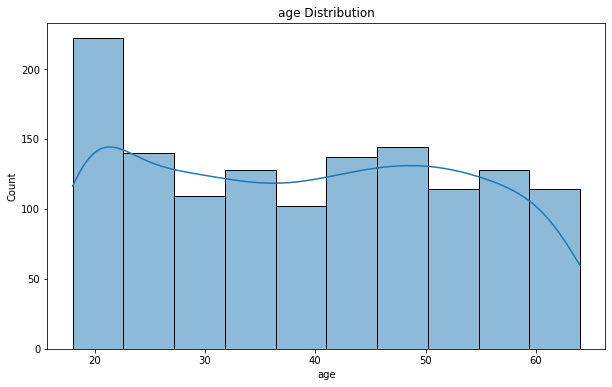

In [41]:
plt.figure(figsize = (10,6))
sns.histplot(ins_data['age'],kde = True,bins = 10)
plt.title('age Distribution')
plt.show()

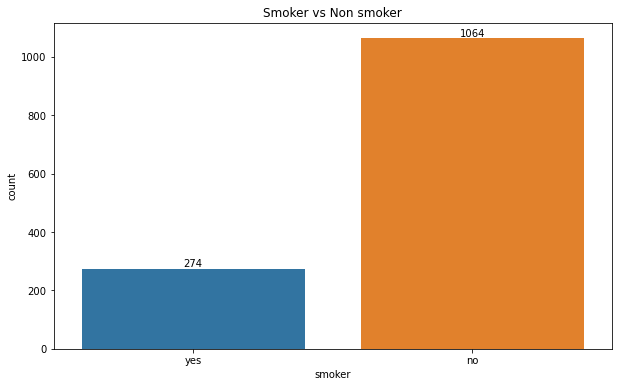

In [42]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = ins_data, x = 'smoker')
for var in ax.containers:
    ax.bar_label(var)
    
    
plt.title("Smoker vs Non smoker")
plt.show()

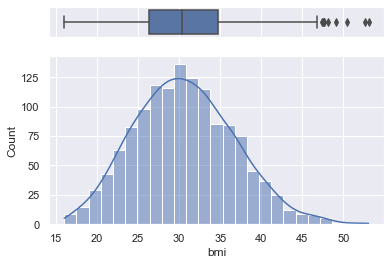

In [44]:
sns.set(style = 'darkgrid')
f,(ax_box , ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
sns.boxplot(data=ins_data, x = 'bmi',ax=ax_box)
sns.histplot(data=ins_data, x= 'bmi', ax=ax_hist, kde = True)
ax_box.set(xlabel='')
plt.show()

# Treating Outliers

In [45]:
Q1 = ins_data['bmi'].quantile(0.25)
Q3 = ins_data['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [47]:
Q1,Q3,IQR,lower_limit,upper_limit

(26.3, 34.7, 8.400000000000002, 13.699999999999998, 47.300000000000004)

In [48]:
ins_data_outlier_free = ins_data[(ins_data['bmi']> lower_limit) & (ins_data['bmi'] < upper_limit)]

In [49]:
ins_data_outlier_free

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [55]:
Q1_out_free = ins_data_outlier_free['bmi'].quantile(0.25)
Q3_out_free = ins_data_outlier_free['bmi'].quantile(0.75)
IQR_out_free = Q3 - Q1
lower_limit_out_free = Q1 - (1.5 * IQR)
upper_limit_out_free = Q3 + (1.5 * IQR)

In [56]:
Q1_out_free, Q3_out_free, IQR_out_free, lower_limit_out_free, upper_limit_out_free

(26.2, 34.5, 8.3, 13.749999999999998, 46.95)

In [50]:
ins_data_with_outlier = ins_data[(ins_data['bmi']> lower_limit) | (ins_data['bmi'] < upper_limit)]

In [51]:
ins_data_with_outlier

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


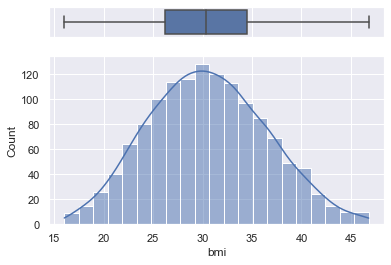

In [52]:
sns.set(style = 'darkgrid')
f,(ax_box , ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
sns.boxplot(data=ins_data_outlier_free, x = 'bmi',ax=ax_box)
sns.histplot(data=ins_data_outlier_free, x= 'bmi', ax=ax_hist, kde = True)
ax_box.set(xlabel='')
plt.show()

From the above graph we can say that:
- Avg BMI is araound 30
- 75% of BMI is under 33.
- 25% of BMI is less than 26.


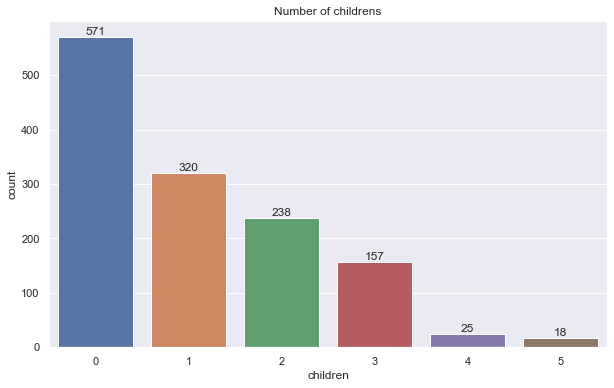

In [58]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = ins_data_outlier_free, x = 'children')
for var in ax.containers:
    ax.bar_label(var)
    
    
plt.title("Number of childrens")
plt.show()

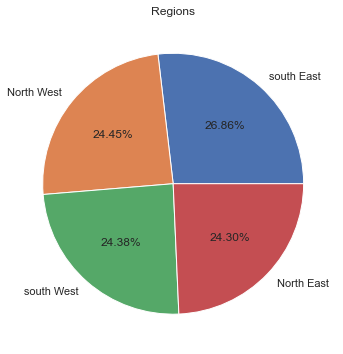

In [63]:
type_value_count = ins_data_outlier_free['region'].value_counts(normalize=True)*100
plt.figure(figsize = (10,6))
plt.pie(type_value_count, labels=['south East','North West','south West','North East'],autopct='%1.2f%%', pctdistance = 0.6)

       
plt.title("Regions")
plt.show()

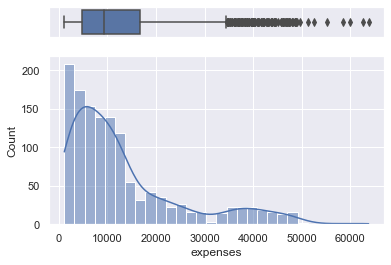

In [65]:
sns.set(style = 'darkgrid')
f,(ax_box , ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
sns.boxplot(data=ins_data, x = 'expenses',ax=ax_box)
sns.histplot(data=ins_data, x= 'expenses', ax=ax_hist, kde = True)
ax_box.set(xlabel='')
plt.show()

# Data is highly right skewed.  
## we transform the data to make it normal.

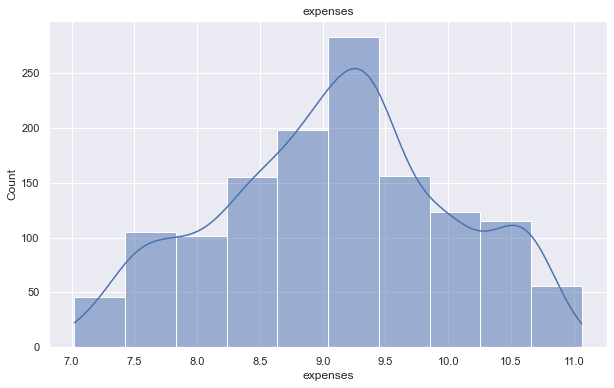

In [66]:
plt.figure(figsize = (10,6))
sns.histplot(np.log(ins_data['expenses']),kde = True,bins = 10)
plt.title('expenses')
plt.show()